# (INCOMPLETE)


In [30]:
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import v2
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [49]:
from pathlib import Path
from helper_functions import walk_through_dir

image_path = Path("data/vehicle_images")
image_path_list = list(image_path.glob("*/*/*.jpg"))

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\vehicle_images'.
There are 2 directories and 0 images in 'data\vehicle_images\test'.
There are 0 directories and 51 images in 'data\vehicle_images\test\four wheeler'.
There are 0 directories and 82 images in 'data\vehicle_images\test\two wheeler'.
There are 2 directories and 0 images in 'data\vehicle_images\train'.
There are 0 directories and 207 images in 'data\vehicle_images\train\four wheeler'.
There are 0 directories and 348 images in 'data\vehicle_images\train\two wheeler'.


In [10]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(WindowsPath('data/vehicle_images/train'),
 WindowsPath('data/vehicle_images/test'))

In [11]:
train_transform = v2.Compose(
    [
        v2.Resize((224, 224)),
        v2.TrivialAugmentWide(num_magnitude_bins=31),
        v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
    ]
)
test_transform = v2.Compose(
    [
        v2.Resize((224, 224)),
        v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
    ]
)

In [60]:
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

In [21]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

torch.manual_seed(42)
train_loader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_loader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x19d03d1bf20>,
 <torch.utils.data.dataloader.DataLoader at 0x19d03d193a0>)

In [22]:
class_names = train_data.classes
class_names

['four wheeler', 'two wheeler']

In [23]:
class_dict = train_data.class_to_idx
class_dict

{'four wheeler': 0, 'two wheeler': 1}

In [24]:
len(train_data), len(test_data)

(555, 133)

In [46]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label,class_names[label]}")
print(f"Label datatype: {type(label)}")

Image tensor:
Image([[[0.8824, 0.8824, 0.8863,  ..., 0.5882, 0.3922, 0.3529],
        [0.8824, 0.8863, 0.8863,  ..., 0.5608, 0.4039, 0.3569],
        [0.8824, 0.8863, 0.8863,  ..., 0.5569, 0.4039, 0.3647],
        ...,
        [0.6431, 0.6431, 0.6431,  ..., 0.5922, 0.6196, 0.6431],
        [0.6235, 0.6196, 0.6000,  ..., 0.5725, 0.6000, 0.6196],
        [0.5765, 0.5333, 0.6471,  ..., 0.5529, 0.6000, 0.5882]],

       [[0.8784, 0.8824, 0.8824,  ..., 0.5882, 0.3804, 0.3216],
        [0.8824, 0.8824, 0.8824,  ..., 0.5608, 0.3922, 0.3255],
        [0.8824, 0.8824, 0.8824,  ..., 0.5529, 0.3882, 0.3294],
        ...,
        [0.6275, 0.6314, 0.6314,  ..., 0.5647, 0.5961, 0.6157],
        [0.6118, 0.6078, 0.5882,  ..., 0.5412, 0.5765, 0.5882],
        [0.5725, 0.5255, 0.6314,  ..., 0.5176, 0.5804, 0.5608]],

       [[0.9294, 0.9333, 0.9373,  ..., 0.5608, 0.3490, 0.2784],
        [0.9294, 0.9333, 0.9373,  ..., 0.5373, 0.3608, 0.2824],
        [0.9333, 0.9373, 0.9373,  ..., 0.5333, 0.3569, 0.286

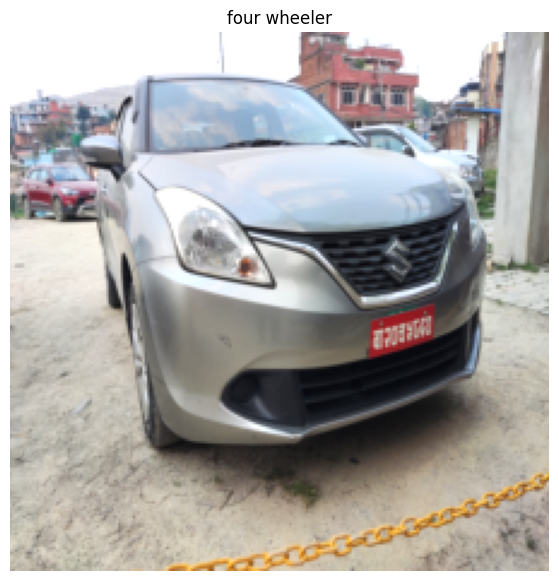

In [32]:
# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label])

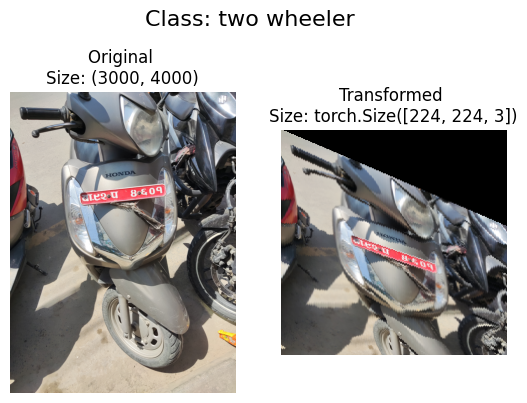

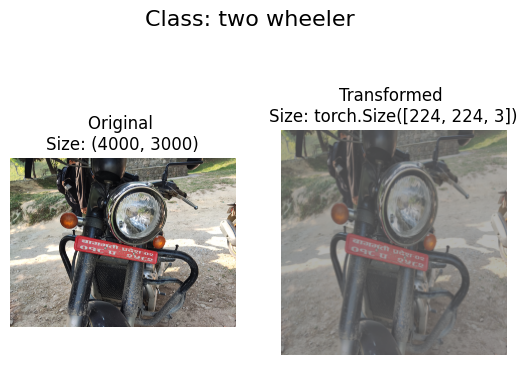

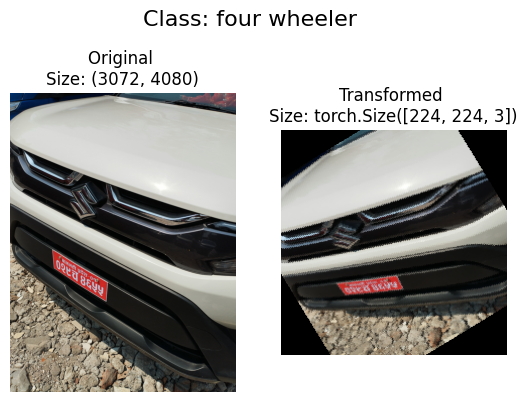

In [59]:
import random


def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_path_list, train_transform, n=3)